# Beginner Tutorial

http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

## What is pytorch

### torch tensors

In [1]:
import torch

In [2]:
x = torch.Tensor(3,2) # initialized with random value
print(x)


 0.0000e+00 -8.5899e+09
 5.5853e+04 -8.5920e+09
 3.0245e+35  1.4532e+34
[torch.FloatTensor of size 3x2]



In [3]:
x = torch.randn(4,3)
print(x)
print(x.size()[0])


 0.2731 -1.4716  0.6071
-0.4174  0.4679 -0.2702
-0.5371  1.9599 -0.8709
 0.0819  1.9626 -0.1374
[torch.FloatTensor of size 4x3]

4


In [4]:
y = torch.randn(4,3)
print(x+y)
print(torch.add(x,y))
print(x+y == torch.add(x,y))
print(x+y == x.add_(y))


 0.4231 -1.6769  1.5896
-1.9103 -1.2852 -1.0694
 0.3003  2.8159 -1.4190
-2.2338  1.3920 -0.5818
[torch.FloatTensor of size 4x3]


 0.4231 -1.6769  1.5896
-1.9103 -1.2852 -1.0694
 0.3003  2.8159 -1.4190
-2.2338  1.3920 -0.5818
[torch.FloatTensor of size 4x3]


 1  1  1
 1  1  1
 1  1  1
 1  1  1
[torch.ByteTensor of size 4x3]


 1  1  1
 1  1  1
 1  1  1
 1  1  1
[torch.ByteTensor of size 4x3]



In [5]:
# also torch has no zeros_like attribute.
x = torch.ones(2,3)
print(x)
x = torch.zeros(2,3)
print(x+1)


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]



### Brige to Numpy

In [6]:
import numpy as np

In [7]:
x_np = x.numpy()
print(x_np)

[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [8]:
x = torch.from_numpy(x_np)
print(x)


 0  0  0
 0  0  0
[torch.FloatTensor of size 2x3]



### CUDA tensors

In [9]:
print("if cuda available: ", torch.cuda.is_available())
# let us run this cell only if CUDA is available
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    print(x + y)

if cuda available:  False


## Autograd

### Variables

Variables contains .creator, .data and .grad. 

Another important point

There’s one more class which is very important for autograd implementation - a Function. Variable and Function are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each variable has a .grad_fn attribute that references a function that has created a function (except for Variables created by the user - these have None as .grad_fn).

In [10]:
from torch.autograd import Variable

In [11]:
# initial value should be a torch tensor, not numpy tensor. what is this "requires_grad"?
x = Variable(torch.ones(2), requires_grad=True)
print(x)

Variable containing:
 1
 1
[torch.FloatTensor of size 2]



In [12]:
y = x*x + 2
print(y.grad_fn)

In [13]:
z = y*y*3
out = torch.mean(z)
print(y, z, out)

Variable containing:
 3
 3
[torch.FloatTensor of size 2]
 Variable containing:
 27
 27
[torch.FloatTensor of size 2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [14]:
# when retain_graph is true, the program will not clear buffer and when run it again, the new grad will be added into 
# the original buffer.
out.backward(retain_graph=True)

print(x, y, z, out)
print(x.grad) # x.grad[0] = 2x * 6*y * (1/2) = 2*1 * 6*3 * 0.5 = 18

Variable containing:
 1
 1
[torch.FloatTensor of size 2]
 Variable containing:
 3
 3
[torch.FloatTensor of size 2]
 Variable containing:
 27
 27
[torch.FloatTensor of size 2]
 Variable containing:
 27
[torch.FloatTensor of size 1]

Variable containing:
 18
 18
[torch.FloatTensor of size 2]



In [15]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
 1547.4574
-1259.5884
  -74.7870
[torch.FloatTensor of size 3]



In [16]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients) # if not pass gradients into it, then it will report error since y is not scalar.
print(x.grad)
print(y.grad)

Variable containing:
  204.8000
 2048.0000
    0.2048
[torch.FloatTensor of size 3]

None


## Create Neural Network

Now that you had a glimpse of autograd, nn depends on autograd to define models and differentiate them. An **nn.Module contains layers, and a method forward(input)that returns the output.**

In [17]:
import torch.nn as nn
import torch.nn.functional as F

### side note on "super" use in python

It is about **mutiple inheritance**.

    class This_is_a_very_long_class_name(object):
        def __init__(self):
            pass

    class Derived(This_is_a_very_long_class_name):
        def __init__(self):
            super(Derived,self).__init__()   #1
            This_is_a_very_long_class_name.__init__(self)    #2

**Also in python3+, just "super().__init__()" is enough**

In [18]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # 1. define cnn kernel / conv2d operations
        self.conv1 = nn.Conv2d(1, 6, 5) # input channels, output channels, kernel size
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 2. define affine operations
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # conv1 layer: conv1 -> relu -> max_pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # conv2 layer: conv2 -> relu -> max_pooling
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten x and self.num_flat_features(x) return dimension of x.
        x = x.view(-1, self.num_flat_features(x))
        # dense layer 1, 2, 3(no relu)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    def num_flat_features(self, x):
        # compute the total flatten dimention of input x 
        size = x.size()[1:] # except the first batch dimension
        num_features = 1
        # why use for loop here? Is there any simpler way?
        for s in size:
            num_features *= s
        return num_features

In [19]:
net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [20]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [21]:
# define input
indata = Variable(torch.randn(1,1,32,32))
out = net(indata)
print(out)
print(out.size())

Variable containing:
-0.0282  0.0425 -0.0465  0.1129 -0.0512  0.0629  0.0334 -0.0488  0.0374 -0.1139
[torch.FloatTensor of size 1x10]

torch.Size([1, 10])


**torch.nn only supports mini-batches** The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.

In [22]:
target = Variable(torch.arange(1,11))
criterion = nn.MSELoss() # define loss function

loss = criterion(out, target)
print(loss)

Variable containing:
 38.5980
[torch.FloatTensor of size 1]



### back propagation

So, when we call loss.backward(), the whole graph is differentiated w.r.t. the loss, and all Variables in the graph will have their .grad Variable accumulated with the gradient.

**Each F functional operations can only be used once.** So we need to re-define it after one single backward.

In [23]:
# set all gradients into zeros
net.zero_grad()

print("conv1.bias.grad before backward")
print(net.conv1.bias.grad)

out = net(indata) # forward function
loss = criterion(out, target)
loss.backward()

print("conv1.bias.grad after backward")
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
Variable containing:
1.00000e-02 *
 -2.3051
  0.5452
  0.0576
 -2.7216
  8.7465
 -7.7986
[torch.FloatTensor of size 6]



In [24]:
# sgd -- update parameter
learning_rate = 0.01
for p in net.parameters():
    p.data.sub_(p.grad.data * learning_rate) 

### use optim

In [25]:
import torch.optim as optim

In [26]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
out = net(indata) # forward function
loss = criterion(out, target)
loss.backward()
optimizer.step()    # Does the update

## MNIST Experiment

### Load data

In [29]:
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
# define transoforms
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))]) # mean, std.
# load MNIST datast
trainset = datasets.MNIST(root="./data", train=True, transform=trans, download=True)
testset = datasets.MNIST(root="./data", train=False, transform=trans, download=True)

# define data loader / batch generator
"""
    Data loader. Combines a dataset and a sampler, and provides
    single- or multi-process iterators over the dataset.

    Arguments:
        dataset (Dataset): dataset from which to load the data.
        batch_size (int, optional): how many samples per batch to load
            (default: 1).
        shuffle (bool, optional): set to ``True`` to have the data reshuffled
            at every epoch (default: False).
        sampler (Sampler, optional): defines the strategy to draw samples from
            the dataset. If specified, ``shuffle`` must be False.
        batch_sampler (Sampler, optional): like sampler, but returns a batch of
            indices at a time. Mutually exclusive with batch_size, shuffle,
            sampler, and drop_last.
        num_workers (int, optional): how many subprocesses to use for data
            loading. 0 means that the data will be loaded in the main process
            (default: 0)
        collate_fn (callable, optional): merges a list of samples to form a mini-batch.
        pin_memory (bool, optional): If ``True``, the data loader will copy tensors
            into CUDA pinned memory before returning them.
        drop_last (bool, optional): set to ``True`` to drop the last incomplete batch,
            if the dataset size is not divisible by the batch size. If False and
            the size of dataset is not divisible by the batch size, then the last batch
            will be smaller. (default: False)
    """
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, num_workers=2)

Processing...
Done!


In [31]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

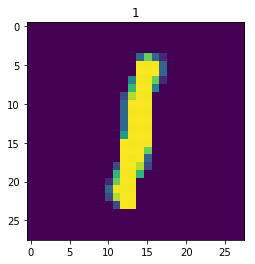

In [49]:
# display a image
plt.imshow(np.squeeze(images[0].numpy()))
plt.title(labels[0])
plt.show()

### Define CNN network

In [69]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5, padding=2)
        self.fc1 = nn.Linear(16 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [70]:
# define optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [72]:
# train the network
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

[1,  2000] loss: 0.271
[1,  4000] loss: 0.175
[1,  6000] loss: 0.129
[1,  8000] loss: 0.111
[1, 10000] loss: 0.098
[1, 12000] loss: 0.088
[1, 14000] loss: 0.083
[2,  2000] loss: 0.066
[2,  4000] loss: 0.063
[2,  6000] loss: 0.067
[2,  8000] loss: 0.053
[2, 10000] loss: 0.054
[2, 12000] loss: 0.063
[2, 14000] loss: 0.056


In [76]:
# verify train result
dataiter = iter(testloader)
images, labels = dataiter.next()

print("Ground truth: ", " ".join('%5s' % labels.numpy()[j] for j in range(4)))

outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j] for j in range(4)))

Ground truth:      7     2     1     0
Predicted:      7     2     1     0


## Train on GPU

TODO: test it on GCP

    net.cuda() # transfer net into gpu
    
    inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda()) # send input and labels into gpu